In [1]:
import sys
import os
import pandas as pd

In [2]:
sys.path.append(os.path.abspath('../..'))

In [3]:
from analysis.preprocessing import load_and_clean_sealevel_data

In [4]:
df = load_and_clean_sealevel_data()
df

,Entity,Code,Day,sea_level_church_and_white_2011,sea_level_uhslc,sea_level_average
0,World,OWID_WRL,1880-04-15,-183.31406,NaN,-183.31406
1,World,OWID_WRL,1880-07-15,-183.24739,NaN,-183.24739
2,World,OWID_WRL,1880-10-15,-174.14740,NaN,-174.14740
3,World,OWID_WRL,1881-01-15,-159.68073,NaN,-159.68073
4,World,OWID_WRL,1881-04-15,-172.41406,NaN,-172.41406
...,...,...,...,...,...,...
558,World,OWID_WRL,2019-10-15,NaN,67.24985,67.24985
559,World,OWID_WRL,2020-01-15,NaN,68.81163,68.81163
560,World,OWID_WRL,2020-04-15,NaN,66.73996,66.73996
561,World,OWID_WRL,2020-07-15,NaN,66.70432,66.70432


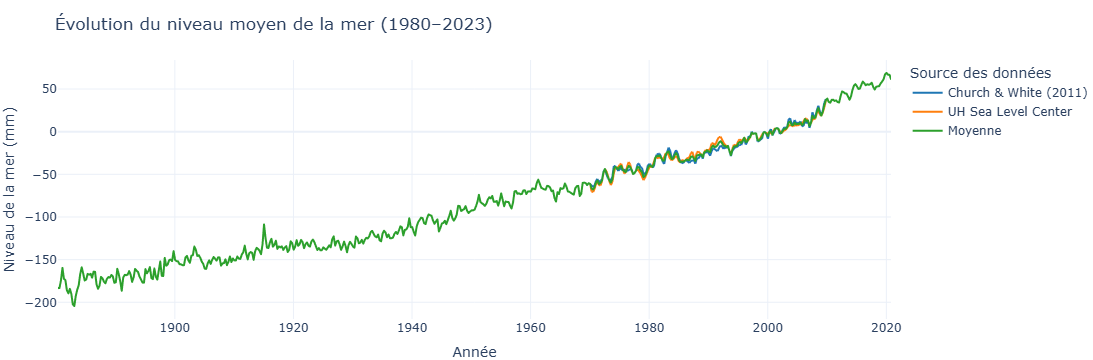

In [5]:
import plotly.express as px

# Transformer le DataFrame en format long
df_melted = df.melt(
    id_vars="Day",
    value_vars=[
        "sea_level_church_and_white_2011",
        "sea_level_uhslc",
        "sea_level_average"
    ],
    var_name="Source",
    value_name="Sea_Level"
)

# Renommer les sources pour la légende
name_map = {
    "sea_level_church_and_white_2011": "Church & White (2011)",
    "sea_level_uhslc": "UH Sea Level Center",
    "sea_level_average": "Moyenne"
}
df_melted["Source"] = df_melted["Source"].map(name_map)

# Palette de couleurs personnalisée (optionnelle)
color_map = {
    "Church & White (2011)": "#1f77b4",  # bleu
    "UH Sea Level Center": "#ff7f0e",    # orange
    "Moyenne": "#2ca02c"                 # vert
}

# Tracer le graphique
fig = px.line(
    df_melted,
    x="Day",
    y="Sea_Level",
    color="Source",
    color_discrete_map=color_map,
    title="Évolution du niveau moyen de la mer (1980–2023)",
    labels={
        "Sea_Level": "Niveau de la mer (mm)",
        "Day": "Année"
    }
)

# Mise en forme
fig.update_layout(
    legend_title_text="Source des données",
    margin={"r":0, "t":60, "l":0, "b":0},
    template="plotly_white"
)

fig.show()
